## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Importing Numpy and Pandas which are important in all over the analysis
import numpy as np
import pandas as pd

# Importing Date and time 
from datetime import datetime

# Importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Importing Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lets extract the data from drive 
airbnb_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airbnb Booking Analysis - Lekkala Srinadh/Airbnb NYC 2019.csv')

# **Lets explore the Data**

In [ ]:
# View the data 
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Basic information about the data
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Lets describe the data
airbnb_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Lets see the shape of the data
airbnb_data.shape

(48895, 16)

In [ ]:
# Lets see the columns of the data
list(airbnb_data.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
# Finding total number of null values
airbnb_data.isnull().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Converting NaN values of reviews_per_month and last_review
airbnb_data['reviews_per_month'].fillna('0', inplace = True)
airbnb_data['last_review'].fillna('0', inplace = True)

In [ ]:
# Lets check the null values
airbnb_data.isnull().sum().sort_values(ascending=False)

host_name                         21
name                              16
id                                 0
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

# **What are the top hosts in NYC according to neighbourhood and Airbnb listings?**

In [ ]:
# Lets check the top neighbourhood with most listings
host_areas = airbnb_data.groupby(['host_id','host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
a=host_areas.sort_values(by='calculated_host_listings_count',ascending=False).rename(columns={'calculated_host_listings_count':'calculated_host_listings_count_max'})
a

,host_id,host_name,neighbourhood_group,calculated_host_listings_count_max
34740,219517861,Sonder (NYC),Manhattan,327
29480,107434423,Blueground,Brooklyn,232
29481,107434423,Blueground,Manhattan,232
19626,30283594,Kara,Manhattan,121
31157,137358866,Kazuya,Brooklyn,103
...,...,...,...,...
13413,13601944,Mark,Brooklyn,1
13412,13599766,David,Manhattan,1
13411,13596820,Michael,Brooklyn,1
13410,13584145,Monika,Manhattan,1


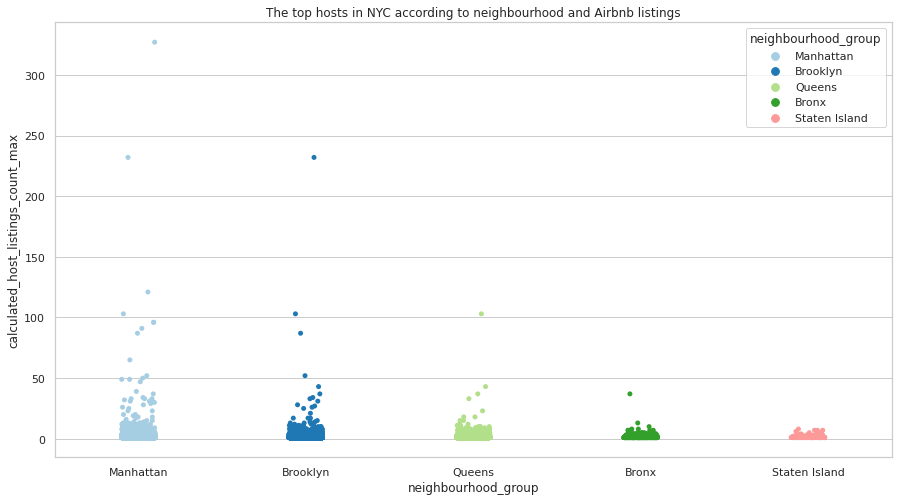

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.stripplot(data=a, x='neighbourhood_group',y='calculated_host_listings_count_max', hue='neighbourhood_group',palette='Paired')
plt.title('The top hosts in NYC according to neighbourhood and Airbnb listings')
plt.show()

# **Now lets check which location got most of the properties**

In [ ]:
# let's see the latitude and longitude columns from the data set
airbnb_data[['latitude','longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


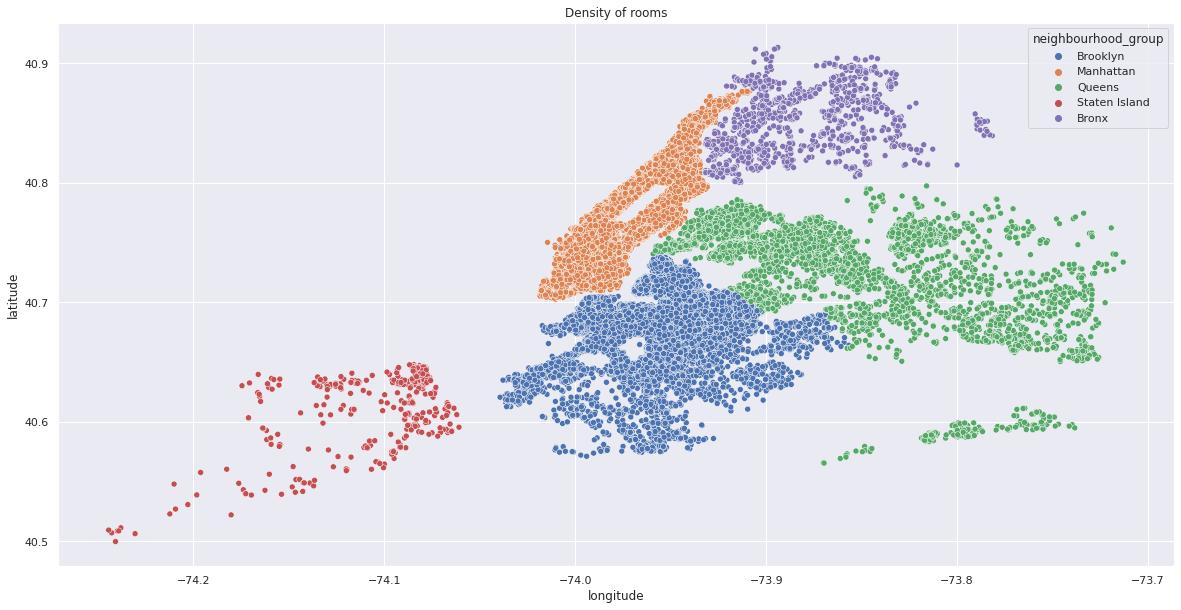

In [ ]:
# With the help of the scatter plot lets find the density of neighbourhood across the location
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
axis_5=sns.scatterplot(data=airbnb_data, y='latitude', x='longitude', hue='neighbourhood_group')
axis_5.set_title('Density of rooms')
axis_5.set_xlabel('longitude')
axis_5.set_ylabel('latitude')
plt.show()

# **Analysis on Room Type on basis of area**

In [ ]:
# The data of room type within the neighbourhood groups
roomtype_within_neighbourhood = airbnb_data.groupby('neighbourhood_group')['room_type'].value_counts()
roomtype_within_neighbourhood.head(20)

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

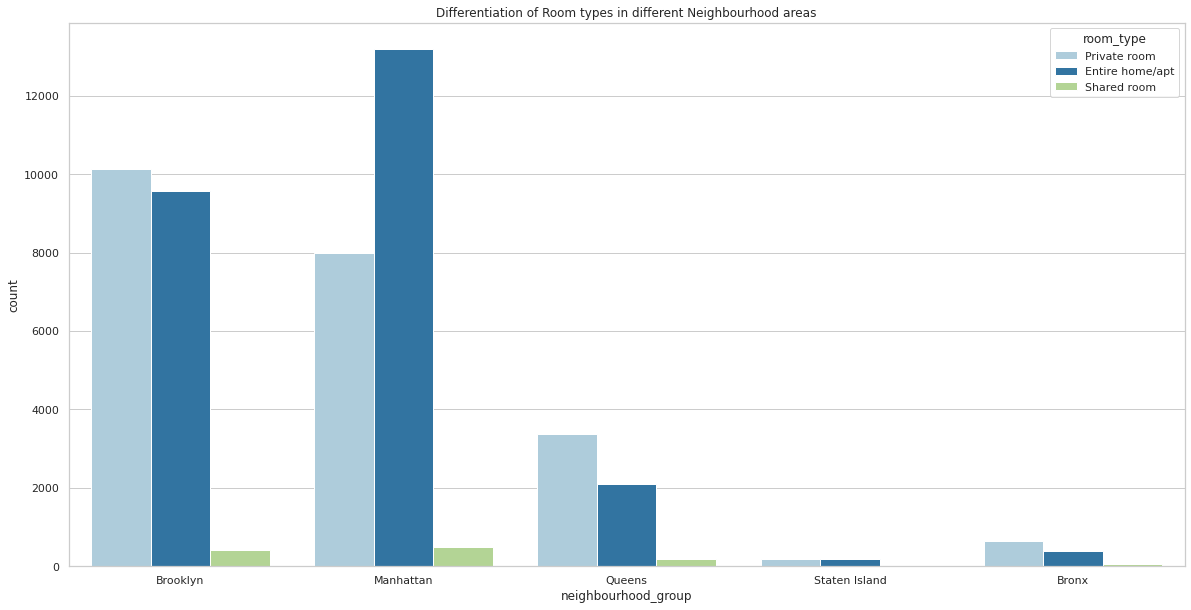

In [ ]:
# Lets plot the above data with the help of countplot
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
sns.countplot(data=airbnb_data, x='neighbourhood_group', hue='room_type',palette='Paired')
plt.title('Differentiation of Room types in different Neighbourhood areas')
plt.show()

# **What can we learn from price predictions**

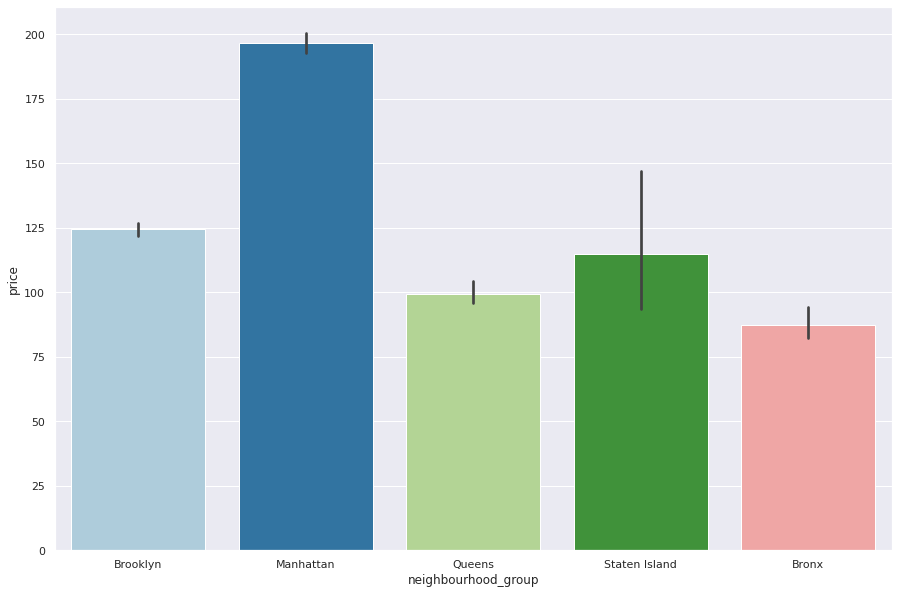

In [ ]:
# prices of each neighbourhood groups
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
sns.barplot(data=airbnb_data, x='neighbourhood_group', y='price', palette='Paired')
plt.show()

In [ ]:
airbnb_data['price_category'] = airbnb_data.apply((lambda x: 'Low price' if x['price']<=90 else 'Affordable price' if x['price']>90 and x['price']<=300 else 'High price' ),axis=1)
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Affordable price
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Affordable price
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0,1,365,Affordable price
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Low price
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0,Low price


In [ ]:
# Lets check unique price category counts
Price_category_counts = airbnb_data.price_category.value_counts().reset_index()
Price_category_counts

,index,price_category
0,Affordable price,25640
1,Low price,19898
2,High price,3357


**Let's create piechart for more clarity for the above data**

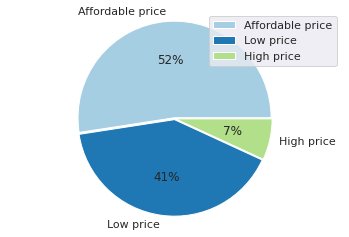

In [ ]:
# declaring exploding pie
explode = [0.01, 0.01, 0.01]

# labels of the data
label=Price_category_counts['index']

# defining seaborn color palette to use
palette_color = sns.color_palette('Paired')

# plotting data on chart
plt.pie(Price_category_counts['price_category'], labels=label, colors=palette_color, explode=explode, autopct='%.0f%%')
plt.legend(label, loc='best')
plt.axis('equal')
plt.show()

In [ ]:
# Grouping the neighbourhood and price category
price_category_neighbourhood= airbnb_data.groupby(['neighbourhood_group','price_category'])['id'].count().reset_index(name='counts')
price_category_neighbourhood

,neighbourhood_group,price_category,counts
0,Bronx,Affordable price,279
1,Bronx,High price,24
2,Bronx,Low price,788
3,Brooklyn,Affordable price,9256
4,Brooklyn,High price,766
5,Brooklyn,Low price,10082
6,Manhattan,Affordable price,14033
7,Manhattan,High price,2452
8,Manhattan,Low price,5176
9,Queens,Affordable price,1942


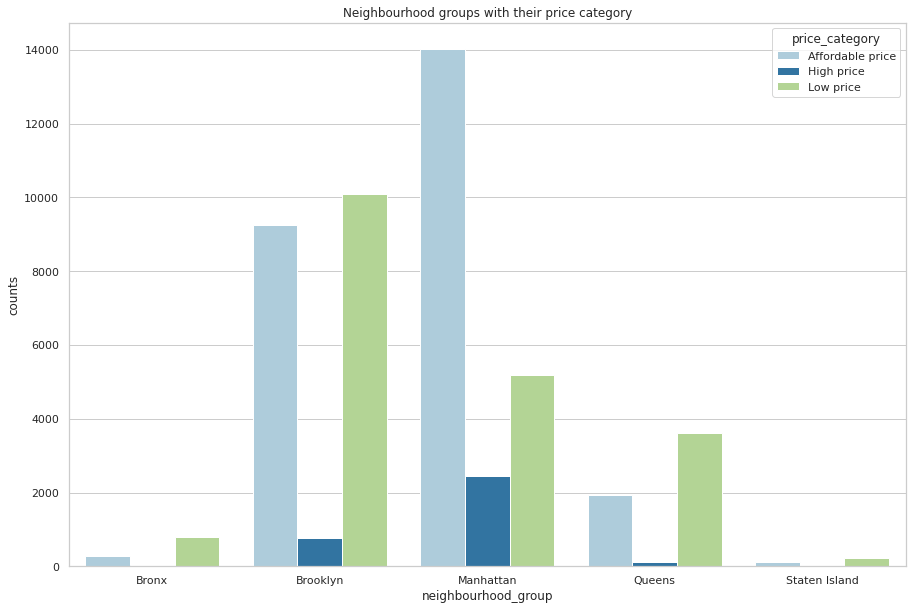

In [ ]:
# Plotting the above data
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.barplot(data=price_category_neighbourhood, x='neighbourhood_group', hue='price_category', y='counts', palette='Paired')
plt.title('Neighbourhood groups with their price category')
plt.show()

# **What can we learn from review predictions**

In [ ]:
# lets see tha total number of reviews
total_no_of_reviews = airbnb_data['number_of_reviews'].sum()
total_no_of_reviews

1138005

In [ ]:
reviews_within_neighbourhood = airbnb_data.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index(name='total_reviews')
reviews_within_neighbourhood

,neighbourhood_group,total_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


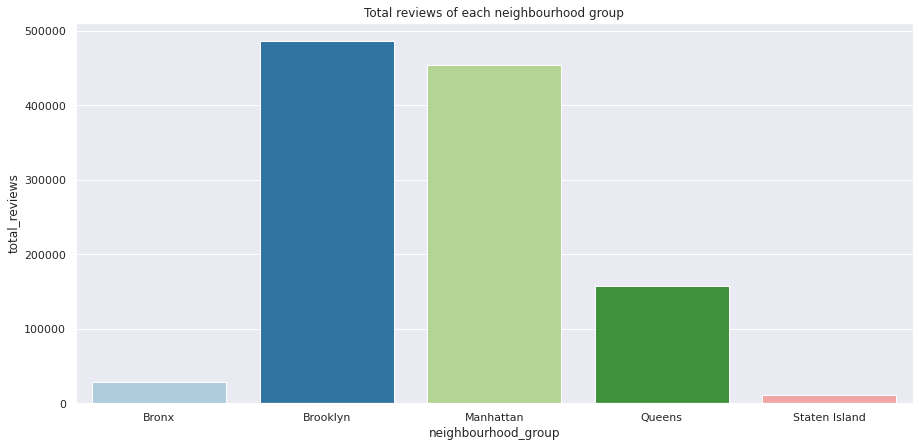

In [ ]:
plt.figure(figsize=(15,7))
sns.set(style='darkgrid')
sns.barplot(data=reviews_within_neighbourhood, x='neighbourhood_group', y='total_reviews',palette='Paired')
plt.title('Total reviews of each neighbourhood group')
plt.show() 

#  **Which hosts are the busiest and why?**

In [ ]:
# Finding busiest hosts
busiest_hosts = airbnb_data.groupby(['host_name','neighbourhood_group'])['host_id'].value_counts().reset_index(name='counts')
busy_hosts=busiest_hosts.sort_values(by=['counts'], ascending=False).head(10)
busy_hosts

,host_name,neighbourhood_group,host_id,counts
33329,Sonder (NYC),Manhattan,219517861,327
4885,Blueground,Manhattan,107434423,230
19034,Kara,Manhattan,30283594,121
16605,Jeremy & Laura,Manhattan,16098958,96
33328,Sonder,Manhattan,12243051,96
7828,Corporate Housing,Manhattan,61391963,91
19836,Ken,Manhattan,22541573,86
19674,Kazuya,Queens,137358866,79
29245,Pranjal,Manhattan,200380610,65
25858,Mike,Manhattan,1475015,52


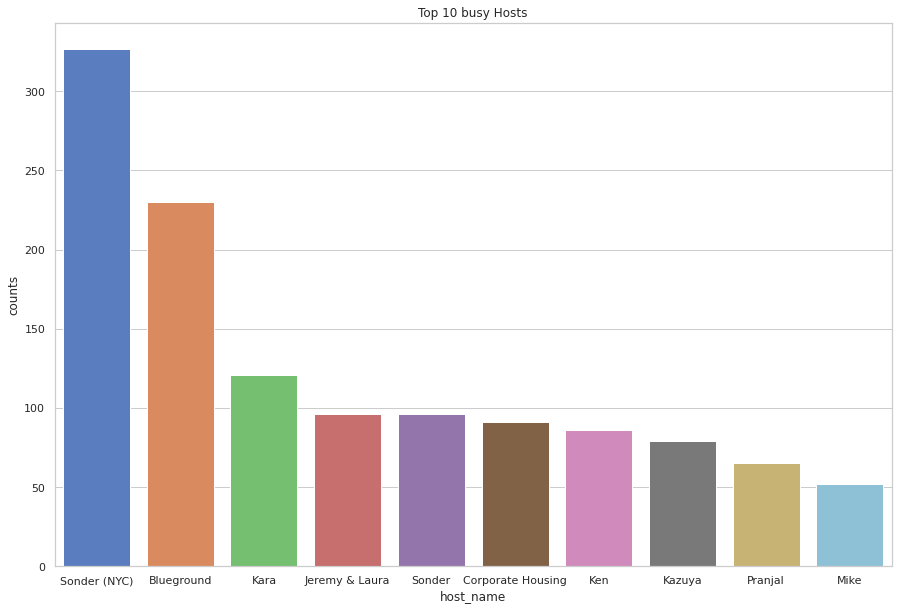

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
sns.barplot(x="host_name", y="counts", data=busy_hosts, palette='muted')
plt.title('Top 10 busy Hosts')
plt.show()

#  **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
df=airbnb_data[airbnb_data.price<300]

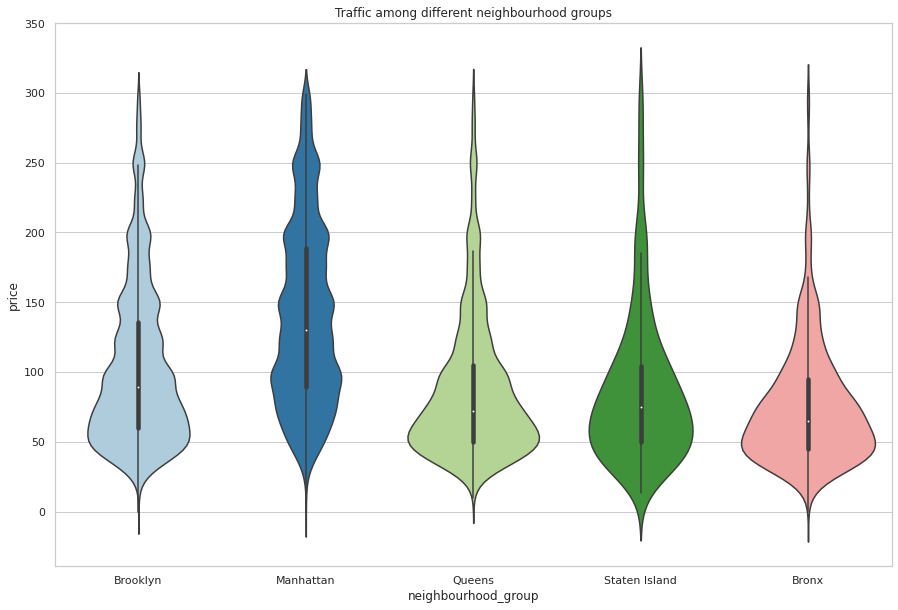

In [ ]:
# plotting traffic among different areas 
plt.figure(figsize=(15,10))
sns.violinplot(data=df, x='neighbourhood_group', y='price', palette='Paired')
plt.title('Traffic among different neighbourhood groups')
plt.show()

#  **Lets look finally on the correlation matrix**

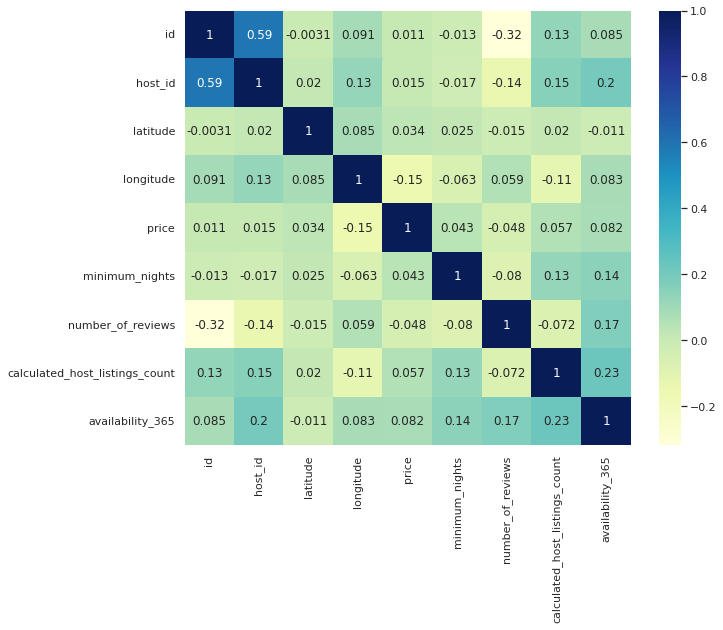

In [ ]:
# correlation matrix
corrmatrix = airbnb_data.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmatrix, cmap='YlGnBu', annot = True)
plt.show()

# **Conclusion**
All done! My workout was over at this point.

The various facts of data analysis that will help the company's business development have all been covered in this article. I have examined how certain important business factors, such as price and review analysis, interact with other factors. I learn a little bit about the hosts and the surrounding areas, etc. Although, in addition to the analysis above, there will always be certain questions that need answering. This analysis will assist the organisation in making decisions regarding their strengths and weaknesses, areas for improvement, and the required adjustments they must do to improve the functionality of their business.

# **🎍 Thank You 🎍**